#### ML Assignment 1 (Regression)

#### Perform EDA and build a model to predict medical insurance costs
- Perform data cleaning
- Deal with missing and duplicate values
- Perform Exploratory data analysis
- Explain which factors influence cost of medical insurance
- Perform data preprocessing
- Select best features for training the model (Feature engineering)
- Train the model using several regression models and find the best model suitable for the problem
- Use hyperparameter tuning to find best parameters for the algorithm
- Evaluate the model using various evaluation metrics


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:xlabel='age', ylabel='Density'>

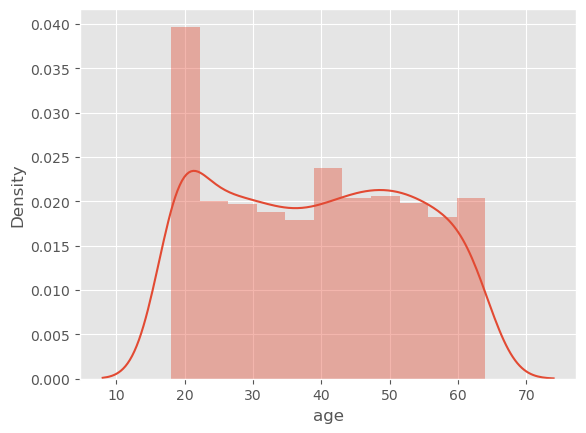

In [6]:
sns.distplot(data['age'])

<AxesSubplot:xlabel='sex', ylabel='count'>

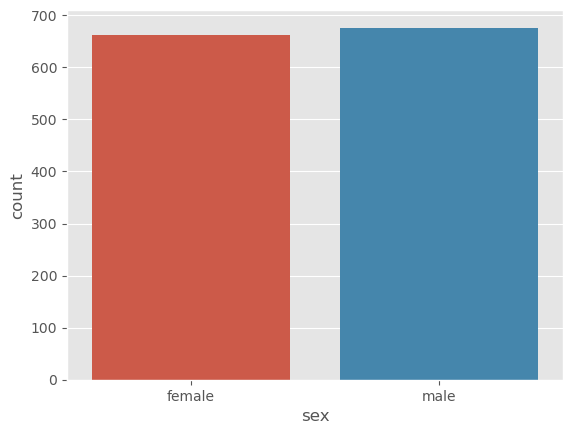

In [7]:
sns.countplot('sex', data = data)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

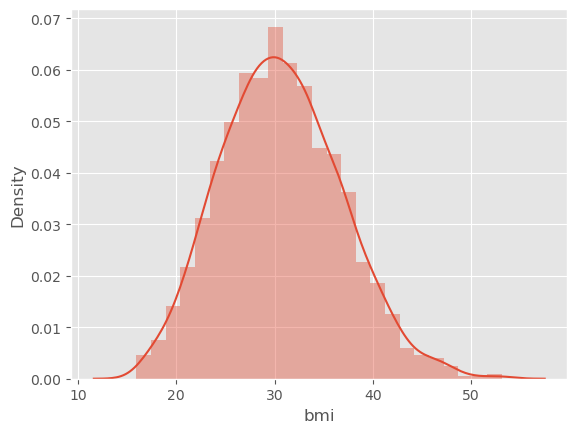

In [8]:
sns.distplot(data['bmi'])

<AxesSubplot:xlabel='children', ylabel='count'>

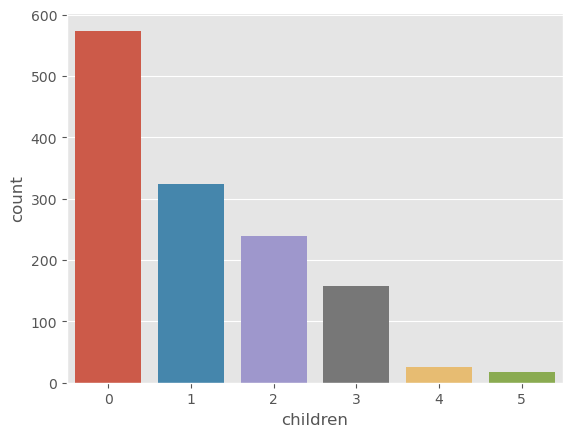

In [9]:
sns.countplot(data['children'])

<AxesSubplot:xlabel='region', ylabel='count'>

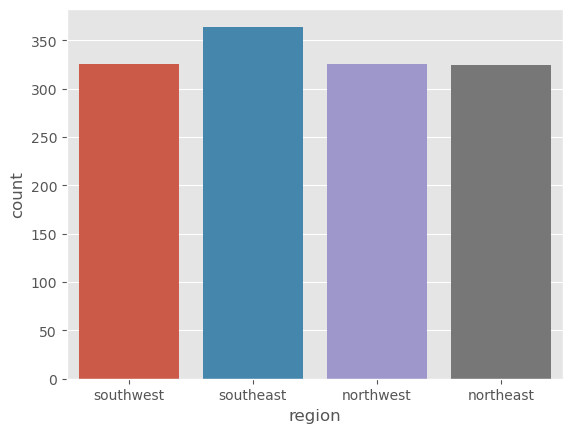

In [10]:
sns.countplot(data['region'])

<AxesSubplot:xlabel='charges', ylabel='Density'>

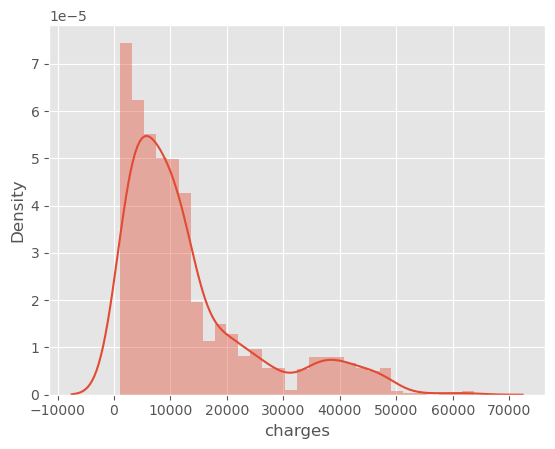

In [11]:
sns.distplot(data['charges'])

<AxesSubplot:xlabel='age', ylabel='charges'>

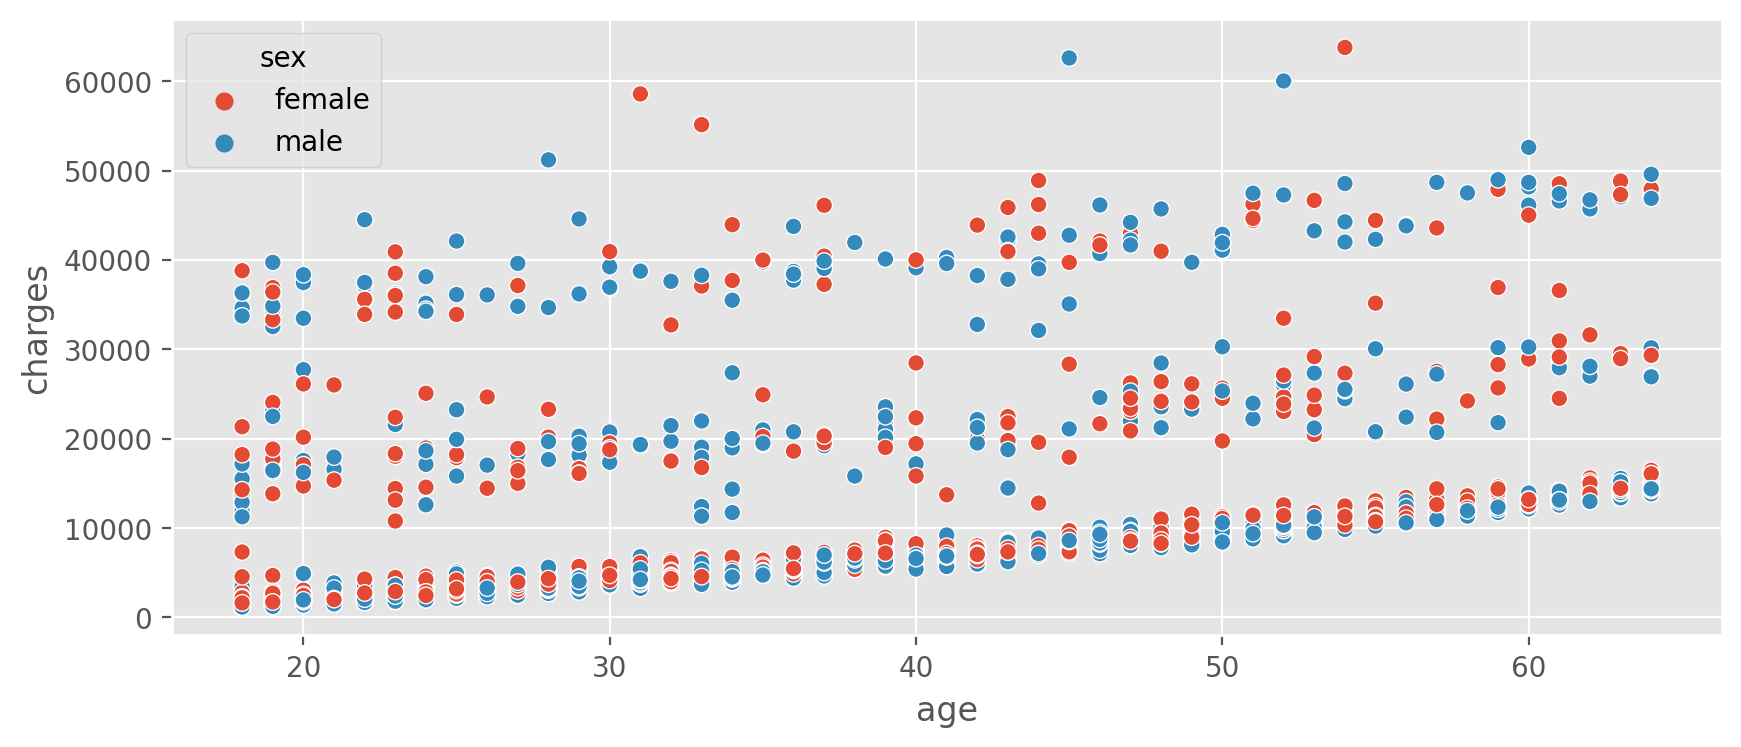

In [12]:
plt.figure(figsize = (10,4) , dpi = 200)
sns.scatterplot('age','charges', hue = 'sex', data = data)

<AxesSubplot:xlabel='sex', ylabel='charges'>

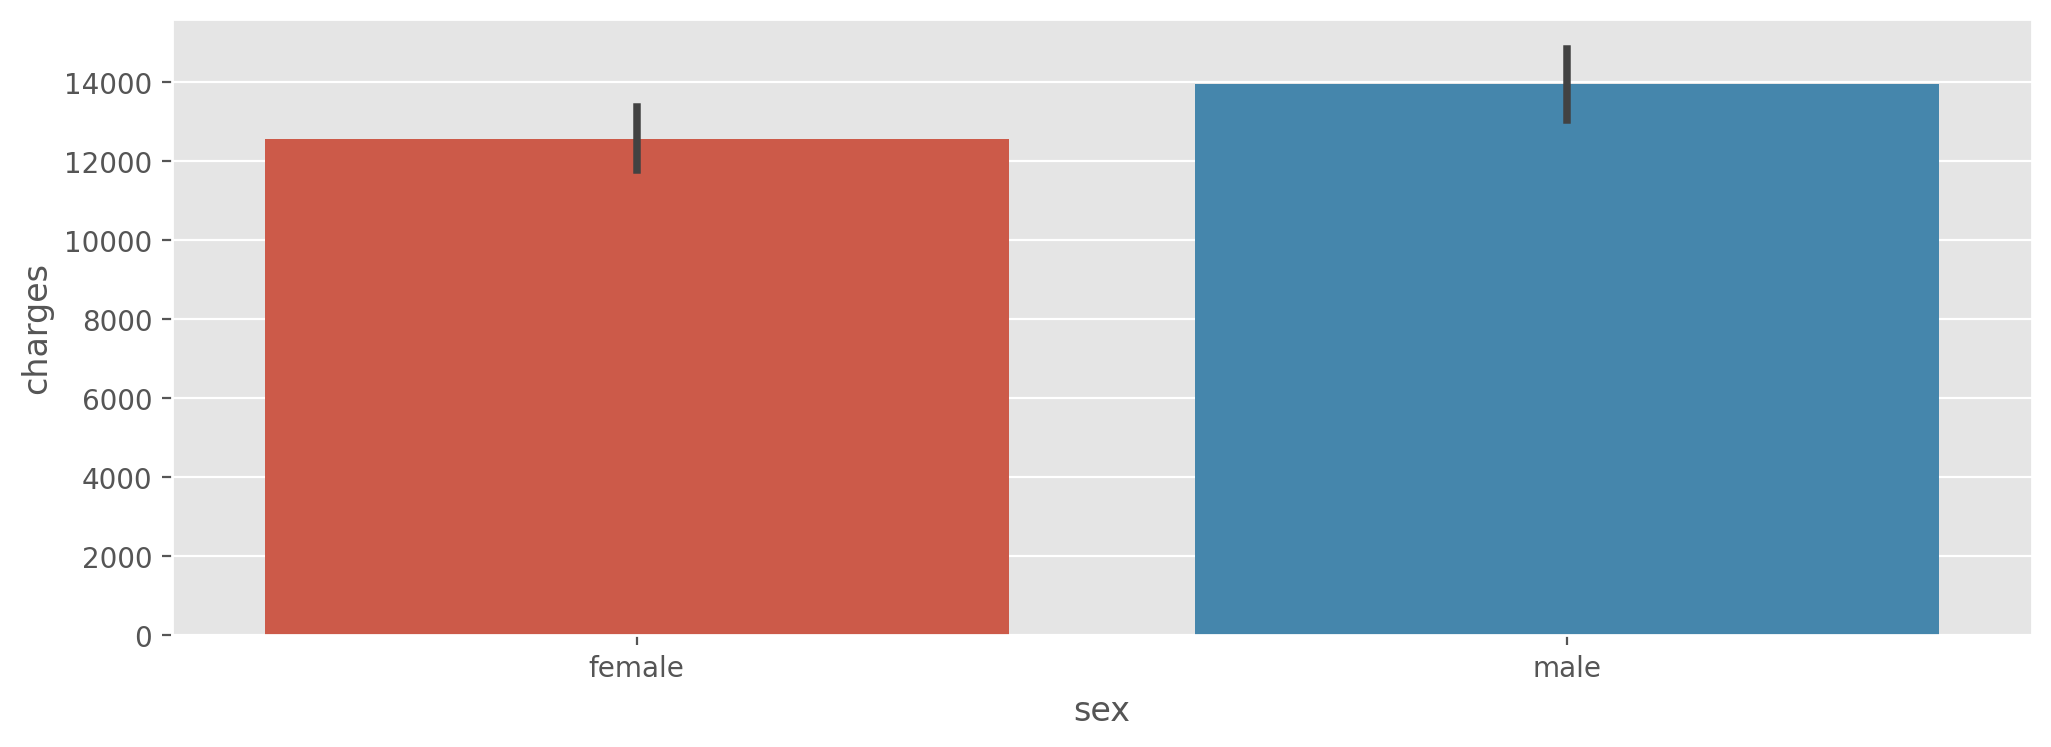

In [13]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.barplot('sex','charges',data = data)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

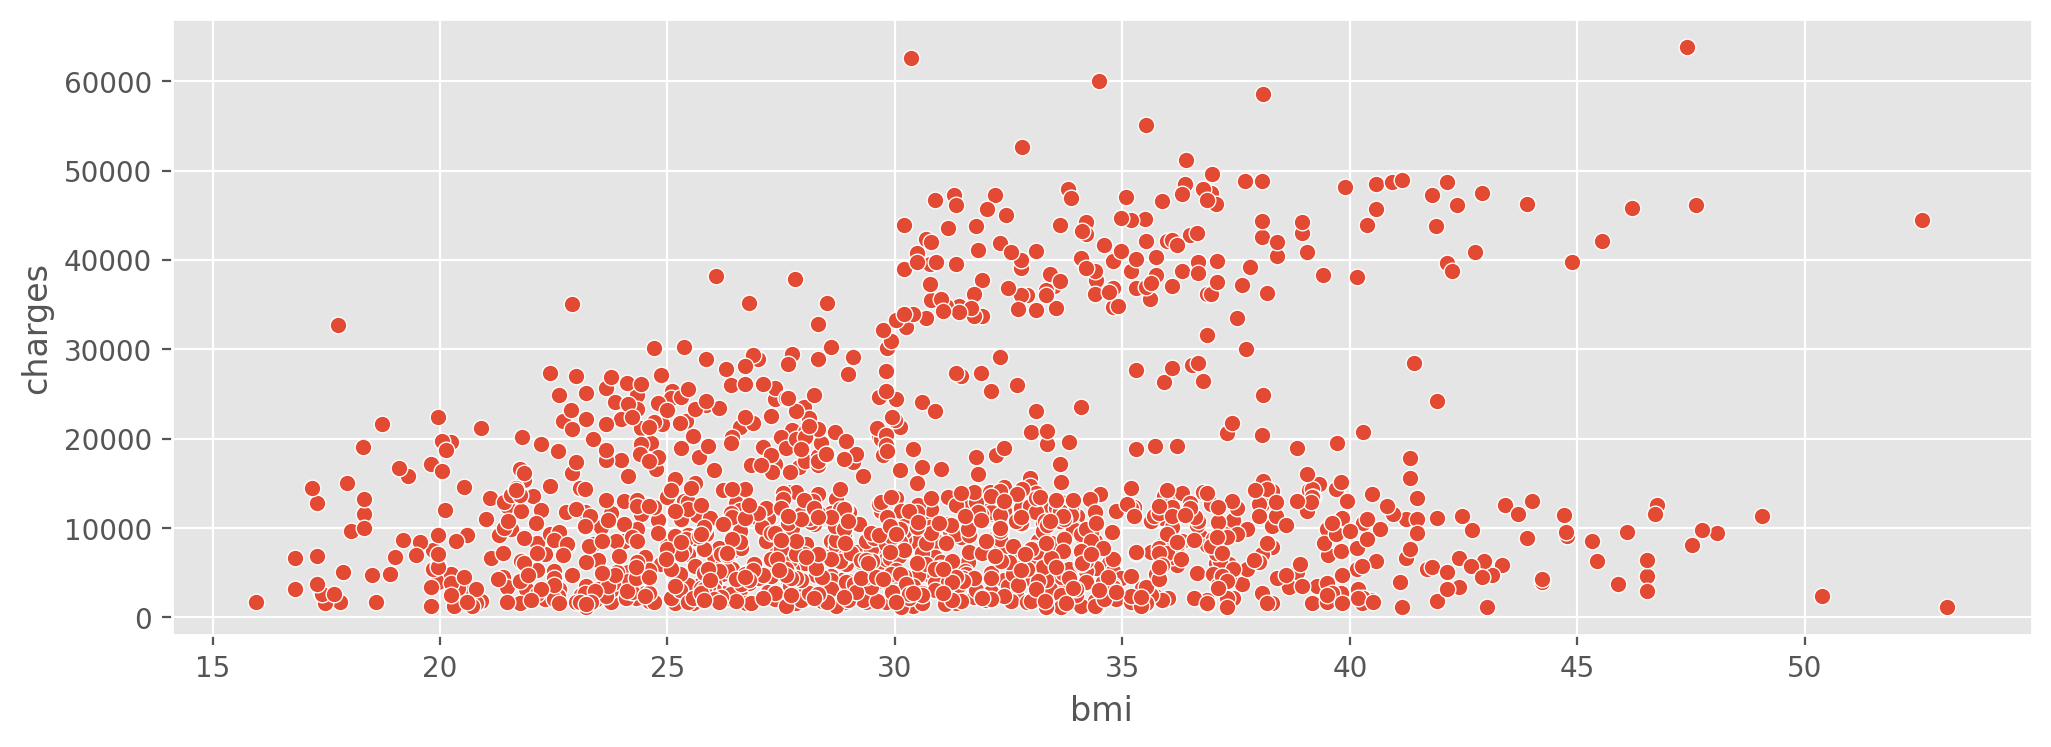

In [14]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.scatterplot('bmi','charges',data = data)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

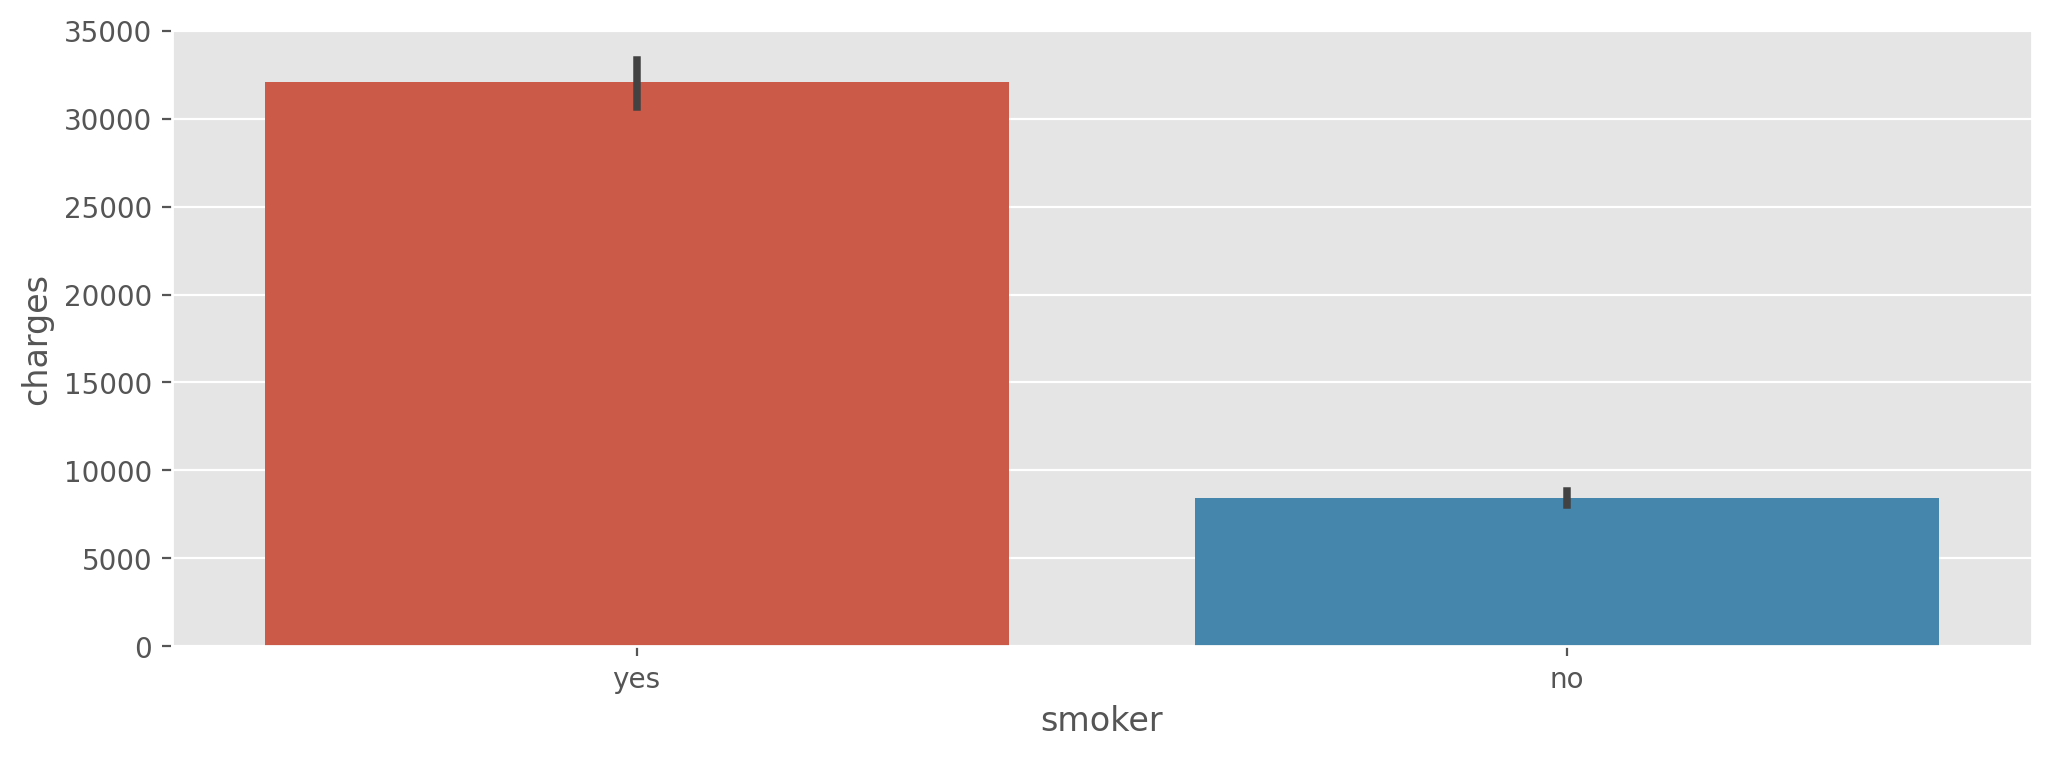

In [15]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.barplot('smoker','charges',data = data)

<AxesSubplot:xlabel='region', ylabel='charges'>

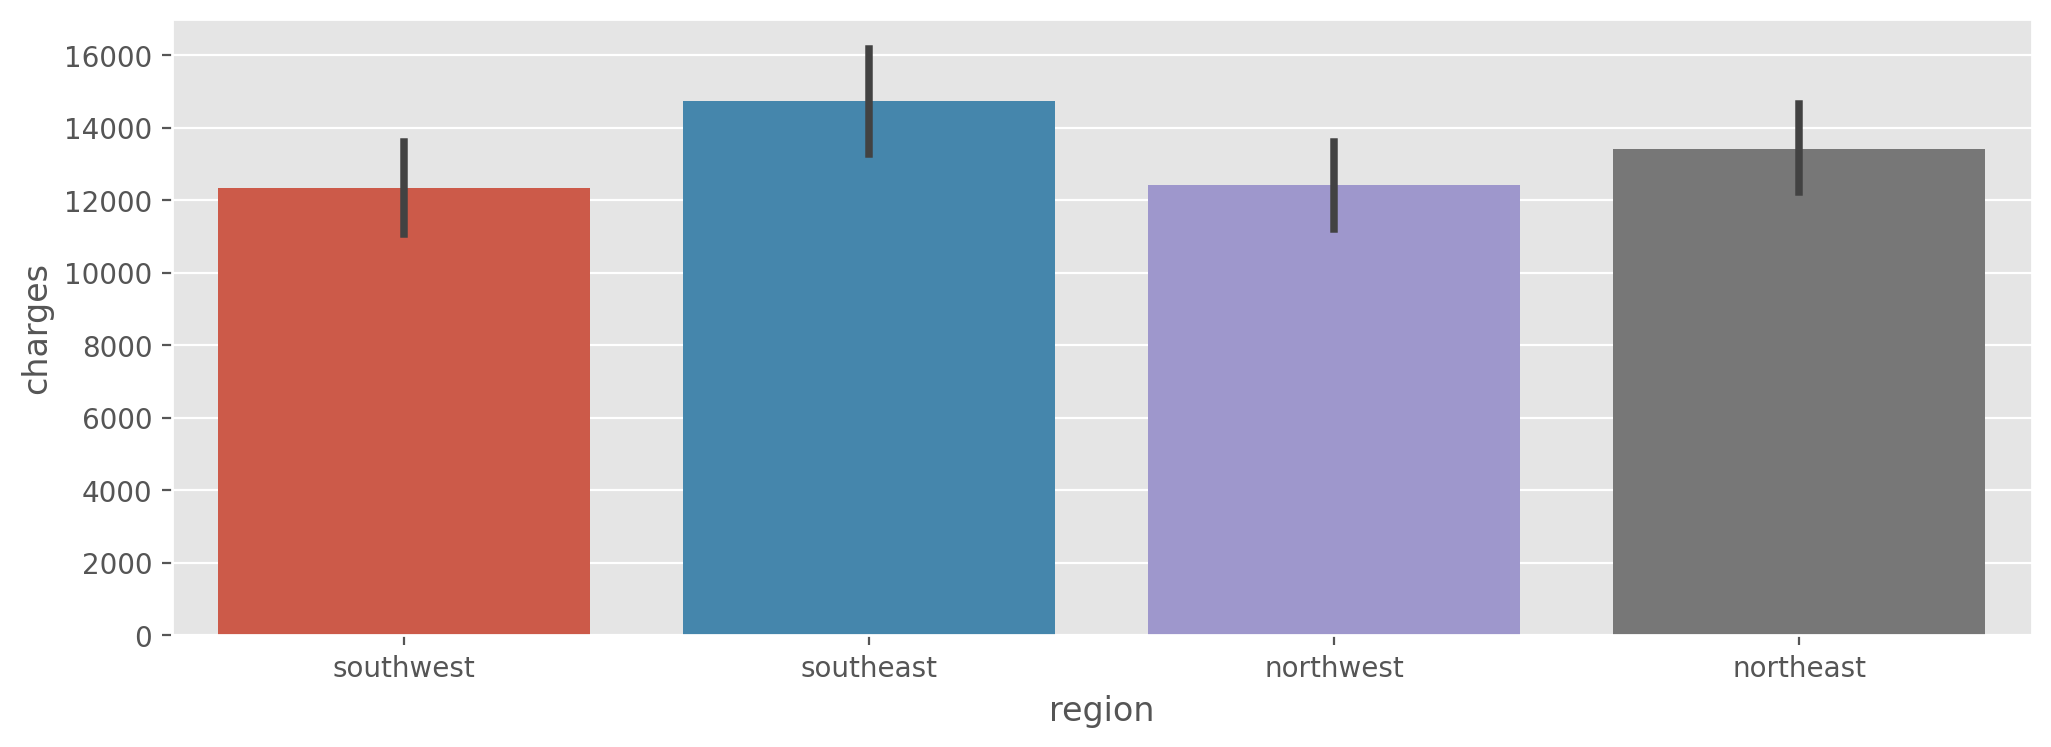

In [16]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.barplot('region','charges',data = data)

<AxesSubplot:xlabel='children', ylabel='charges'>

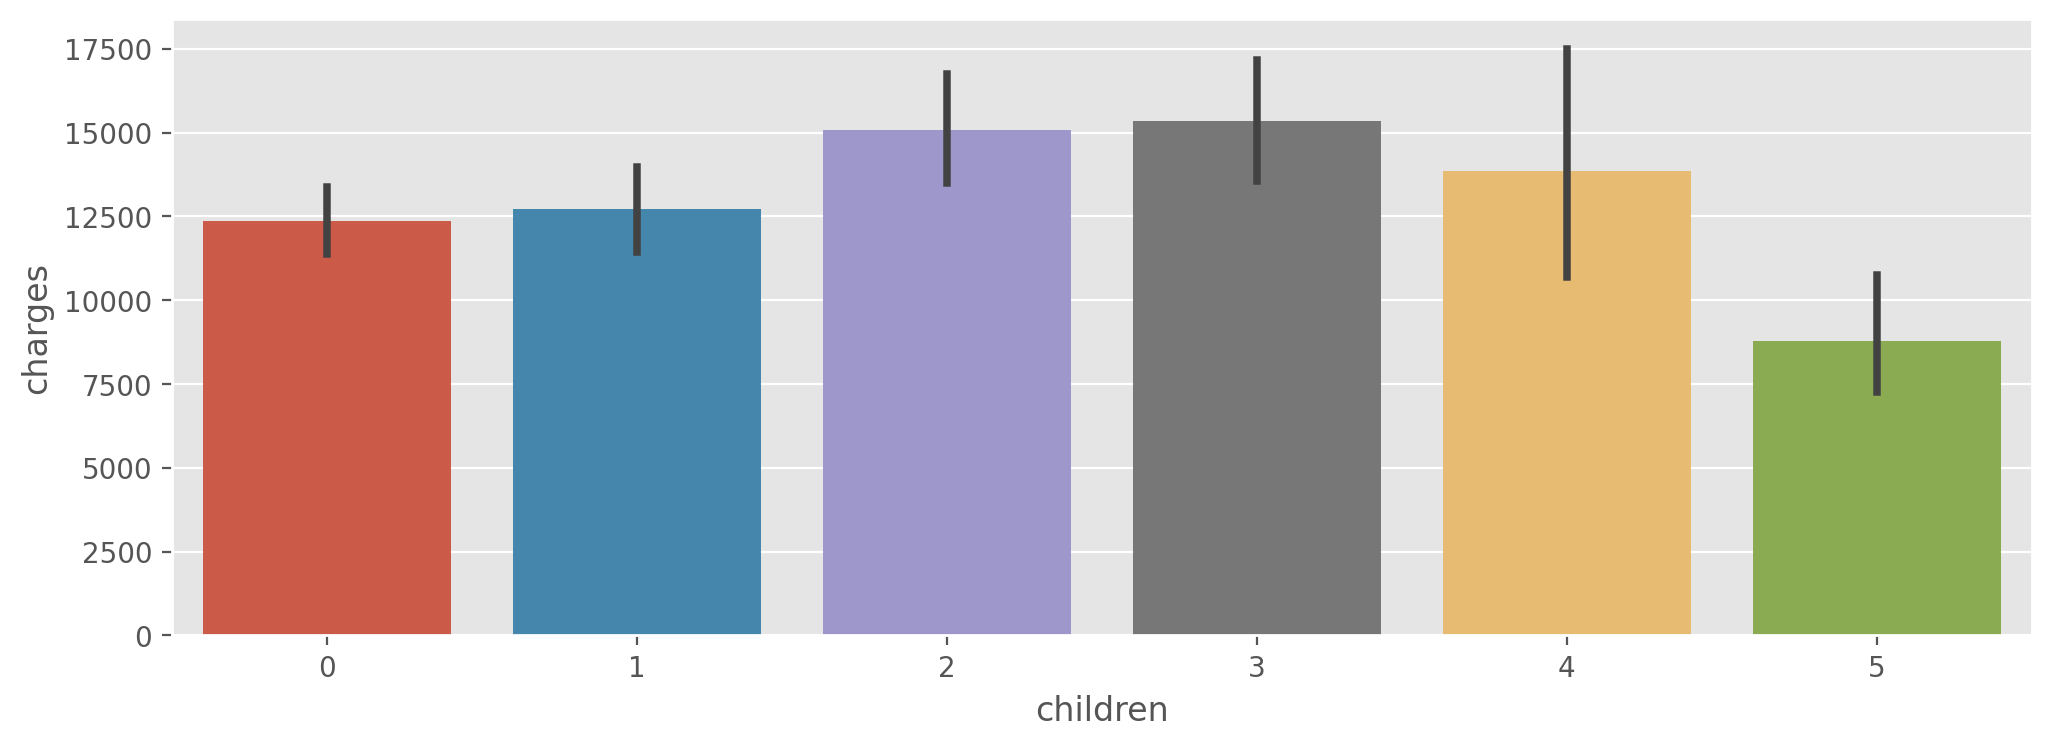

In [17]:
plt.figure(figsize = (12,4) , dpi = 200)
sns.barplot('children','charges',data = data)

- Age has no effect on charges.
- Male has higher insurance charges as compared to female.
- BMI has no effect on charges.
- Average insurance charge is much higher for smokers than non smokers.
- Southeast region has higher charges as compared to others.
- No inference found on charges with no of children.

In [18]:
dummy1 = pd.get_dummies(data.sex)
dummy2 = pd.get_dummies(data.region)

In [19]:
data = pd.concat([dummy1,dummy2,data], axis = 1)

In [20]:
data

,female,male,northeast,northwest,southeast,southwest,age,sex,bmi,children,smoker,region,charges
0,1,0,0,0,0,1,19,female,27.900,0,yes,southwest,16884.92400
1,0,1,0,0,1,0,18,male,33.770,1,no,southeast,1725.55230
2,0,1,0,0,1,0,28,male,33.000,3,no,southeast,4449.46200
3,0,1,0,1,0,0,33,male,22.705,0,no,northwest,21984.47061
4,0,1,0,1,0,0,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0,1,0,1,0,0,50,male,30.970,3,no,northwest,10600.54830
1334,1,0,1,0,0,0,18,female,31.920,0,no,northeast,2205.98080
1335,1,0,0,0,1,0,18,female,36.850,0,no,southeast,1629.83350
1336,1,0,0,0,0,1,21,female,25.800,0,no,southwest,2007.94500


In [21]:
data = data.drop(['sex','region'], axis = 1)

In [22]:
data

,female,male,northeast,northwest,southeast,southwest,age,bmi,children,smoker,charges
0,1,0,0,0,0,1,19,27.900,0,yes,16884.92400
1,0,1,0,0,1,0,18,33.770,1,no,1725.55230
2,0,1,0,0,1,0,28,33.000,3,no,4449.46200
3,0,1,0,1,0,0,33,22.705,0,no,21984.47061
4,0,1,0,1,0,0,32,28.880,0,no,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...
1333,0,1,0,1,0,0,50,30.970,3,no,10600.54830
1334,1,0,1,0,0,0,18,31.920,0,no,2205.98080
1335,1,0,0,0,1,0,18,36.850,0,no,1629.83350
1336,1,0,0,0,0,1,21,25.800,0,no,2007.94500


In [23]:
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})

In [24]:
data.head()

,female,male,northeast,northwest,southeast,southwest,age,bmi,children,smoker,charges
0,1,0,0,0,0,1,19,27.900,0,1,16884.92400
1,0,1,0,0,1,0,18,33.770,1,0,1725.55230
2,0,1,0,0,1,0,28,33.000,3,0,4449.46200
3,0,1,0,1,0,0,33,22.705,0,0,21984.47061
4,0,1,0,1,0,0,32,28.880,0,0,3866.85520


In [32]:
X = data.drop('charges', axis = 1)

In [33]:
data.head()

,female,male,northeast,northwest,southeast,southwest,age,bmi,children,smoker,charges
0,1,0,0,0,0,1,19,27.900,0,1,16884.92400
1,0,1,0,0,1,0,18,33.770,1,0,1725.55230
2,0,1,0,0,1,0,28,33.000,3,0,4449.46200
3,0,1,0,1,0,0,33,22.705,0,0,21984.47061
4,0,1,0,1,0,0,32,28.880,0,0,3866.85520


In [34]:
Y = data[['charges']]

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25)

In [36]:
print('Training data shape :',x_train.shape)
print('Training label shape : ',y_train.shape)
print('Testing data shape : ',x_test.shape)
print('Testing label shape : ',y_test.shape)

Training data shape : (1003, 10)
Training label shape :  (1003, 1)
Testing data shape :  (335, 10)
Testing label shape :  (335, 1)


In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [38]:
pred_train = regressor.predict(x_train)
pred_test  = regressor.predict(x_test)

from sklearn.metrics import r2_score
print('Training set score : ', r2_score(y_train, pred_train))
print('Testing Set score  : ', r2_score(y_test, pred_test))

Training set score :  0.7401139218755644
Testing Set score  :  0.7829332482947543
